# Financial Data Science¶

Based on examples providied by...

## Pycon DE Karlsruhe
### Why Python Has Taken Over Finance

General Thoughts and Practical Examples

Dr. Yves J. Hilpisch | The Python Quants GmbH

Karlsuhe, 26. October 2017
original source: https://gist.github.com/yhilpisch/eb6c8978cf9a752e38529d57ed34b7cc

Sample code from https://gist.github.com/yhilpisch/eb6c8978cf9a752e38529d57ed34b7cc
Updated for current version of Plotly & Cufflinks

In [1]:

import warnings; warnings.simplefilter('ignore')
import pandas as pd


### load the csv data

In [2]:
# data as provided by Thomson Reuters Eikon API
file_location = 'data/tr_eikon_eod_data.csv'
# file_location = 'http://hilpisch.com/tr_eikon_eod_data.csv'

# Note that we have used the date column as index
%time data = pd.read_csv(file_location, index_col=0, parse_dates=True)

CPU times: user 10.9 ms, sys: 3.32 ms, total: 14.2 ms
Wall time: 13.6 ms


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [4]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


### Visulize data

In [5]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

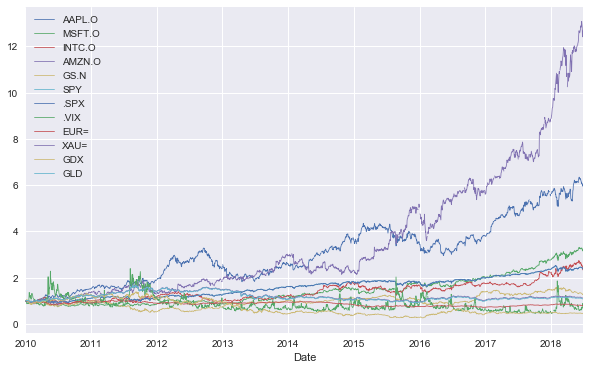

In [6]:
# plot movement relative to the closing price on the first day of the time series
# ignore the first date [0] as there is plenty of data missing - I have replaced with using [1] instead
# (data / data.iloc[0]).plot(figsize=(10, 6), lw=0.8);
(data / data.iloc[1]).plot(figsize=(10, 6), lw=0.8);


### Adding statistics


In [7]:
data = data.loc['2014-1-1':]
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3752,1205.29,NaN,NaN
2014-01-02,79.018492,37.16,25.790,397.97,176.89,182.920,1831.98,14.23,1.3670,1224.51,22.03,118.00
2014-01-03,77.282780,36.91,25.780,396.44,178.15,182.885,1831.37,13.76,1.3587,1236.16,21.83,119.29
2014-01-06,77.704208,36.13,25.460,393.63,179.37,182.360,1826.77,13.55,1.3627,1237.59,21.93,119.50
2014-01-07,77.148137,36.41,25.585,398.03,178.29,183.480,1837.88,12.92,1.3615,1231.49,21.97,118.82


In [8]:
# calculate the 10 and 60 day moving averages
data['SMA1'] = data['EUR='].rolling(10).mean()
data['SMA2'] = data['EUR='].rolling(60).mean()

In [9]:
data.dropna(inplace=True)

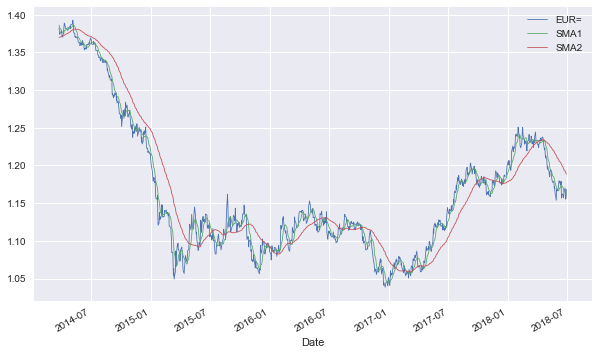

In [10]:
data[['EUR=', 'SMA1', 'SMA2']].plot(figsize=(10, 6), lw=0.8);


### Deriving Positions

In [11]:
import numpy as np


In [12]:
# 1 where 10dMA > 60dMA; -1 othewise
data['Positions'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)


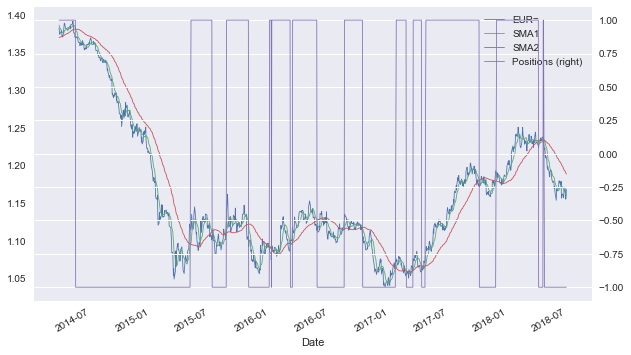

In [13]:
data[['EUR=', 'SMA1', 'SMA2', 'Positions']].plot(figsize=(10, 6),
                                        secondary_y='Positions', lw=0.8);

### Backtesting the Strategy

In [14]:
# the shift function moves the data by the periods .. in this case its 1 day
data['Returns'] = np.log(data['EUR='] / data['EUR='].shift(1))


In [15]:
data['Strategy'] = data['Positions'].shift(1) * data['Returns']


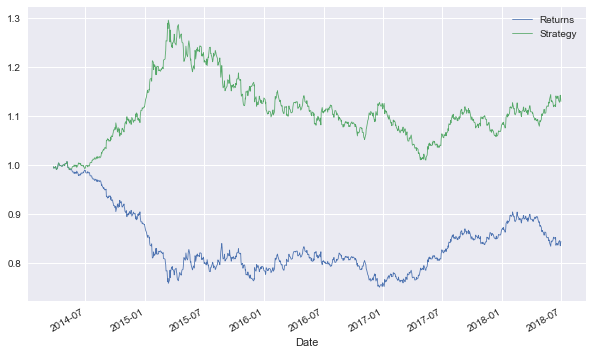

In [16]:
data[['Returns', 'Strategy']].dropna().cumsum().apply(np.exp).plot(
                                figsize=(10, 6), lw=0.8);

### simple statistical analysis

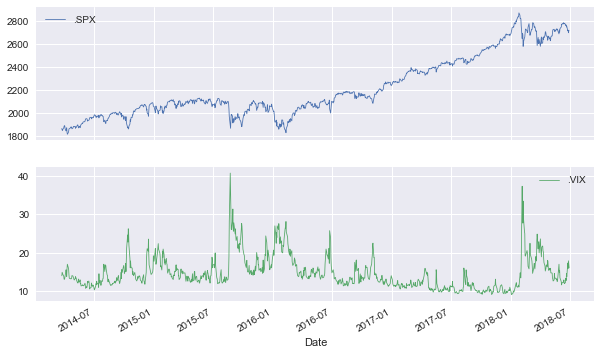

In [17]:
data[['.SPX', '.VIX']].plot(figsize=(10, 6), subplots=True, lw=0.8);


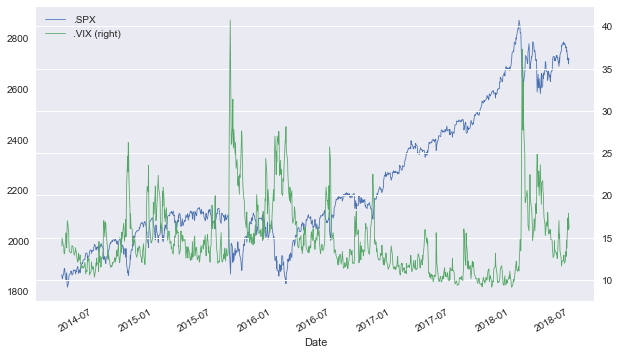

In [18]:
data[['.SPX', '.VIX']].plot(figsize=(10, 6), secondary_y='.VIX', lw=0.8);


In [19]:
rets = np.log(data[['.SPX', '.VIX']] / data[['.SPX', '.VIX']].shift(1))


In [20]:
import seaborn as sns


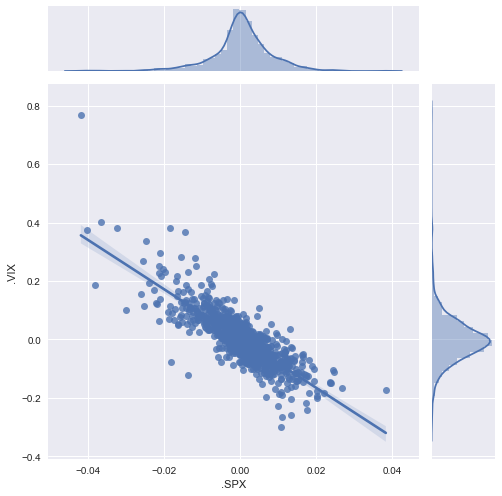

In [21]:
sns.jointplot(rets['.SPX'], rets['.VIX'], kind='reg', size=7)


### interactive financial charting

In [22]:
# data = pd.read_csv('http://hilpisch.com/eurusd.csv',
#                    index_col=0, parse_dates=True)
data = pd.read_csv('data/eurusd.csv',
                   index_col=0, parse_dates=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2820 entries, 2007-06-03 to 2017-05-31
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        2820 non-null   object 
 1   OpenBid     2820 non-null   float64
 2   HighBid     2820 non-null   float64
 3   LowBid      2820 non-null   float64
 4   CloseBid    2820 non-null   float64
 5   OpenAsk     2820 non-null   float64
 6   HighAsk     2820 non-null   float64
 7   LowAsk      2820 non-null   float64
 8   CloseAsk    2820 non-null   float64
 9   TotalTicks  2820 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 242.3+ KB


In [24]:
data = data.loc['2016-1-1':]

In [25]:
data = data[['OpenAsk', 'HighAsk', 'LowAsk', 'CloseAsk']]


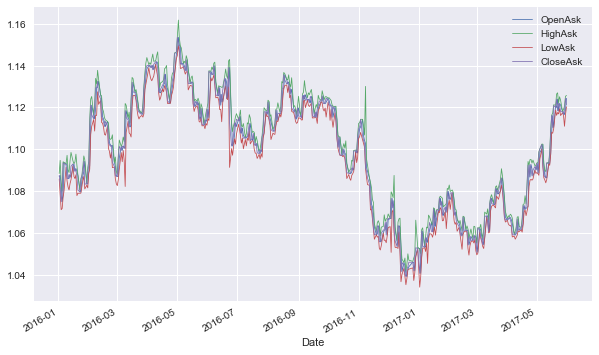

In [26]:
data.plot(figsize=(10, 6), lw=0.8);


### Plotly and Cufflinks

In [27]:
# https://plot.ly/python/v3/ipython-notebooks/cufflinks/
# to install run on terminal: pip install cufflinks --upgrade
# follow instrudction for JupyterLab here https://plot.ly/python/getting-started/

# cufflink examples: https://medium.com/@kbrook10/day-7-data-visualization-how-to-use-plotly-and-cufflinks-for-interactive-data-visualizations-3a4b85fdd999
# cufflinks api doc: https://github.com/santosjorge/cufflinks

import cufflinks as cf
print (cf.__version__)

0.17.3


In [28]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# connect the Javascript to the notebook this call and set the connected to True
init_notebook_mode(connected=True)

In [29]:
# update to use cufflinks offline for interactive visualization
cf.go_offline()

### Regular interactive charts

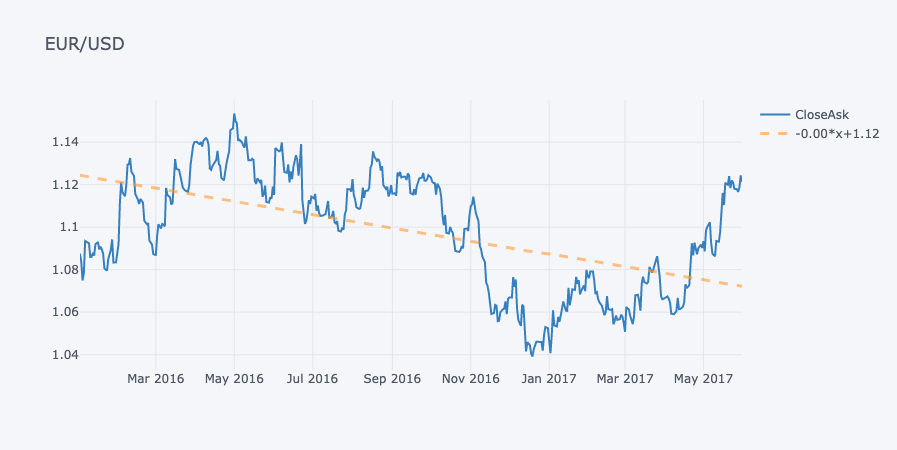

In [35]:

# iplot(data['CloseAsk'].iplot(kind='lines', color='blue', width=2,
#           bestfit=True, title='EUR/USD', asFigure=True))

# Note you use iplot() to plaot with cufflinks
data['CloseAsk'].iplot(kind='lines', color='blue', width=2,
           bestfit=True, title='EUR/USD', asFigure=True)

### Basic Quant Figures

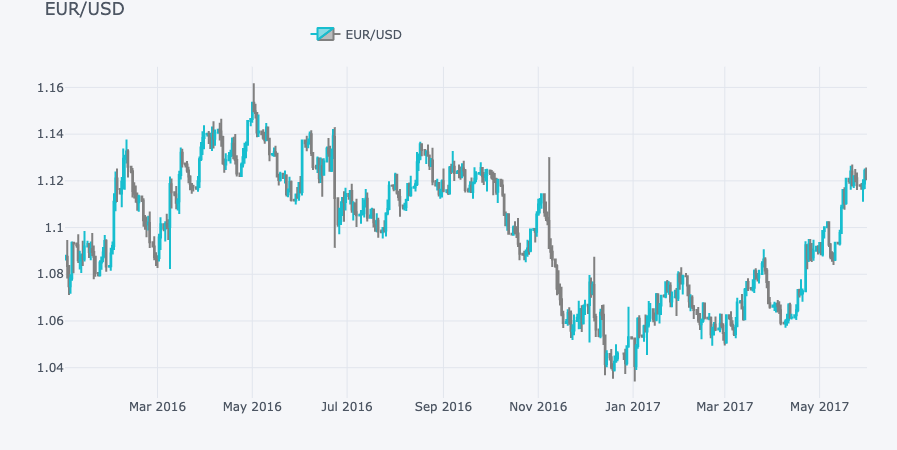

In [39]:
qf = cf.QuantFig(data, title='EUR/USD', legend='top', name='EUR/USD')
qf.iplot(asFigure=True)

## Adding Studies

### Simple Moving Average (SMA)

In [42]:
qf.add_sma([10, 30, 60], colors=['green', 'orange', 'blue'], width=1)
qf.studies['sma']['display'].update(legendgroup=True, showlegend=True)

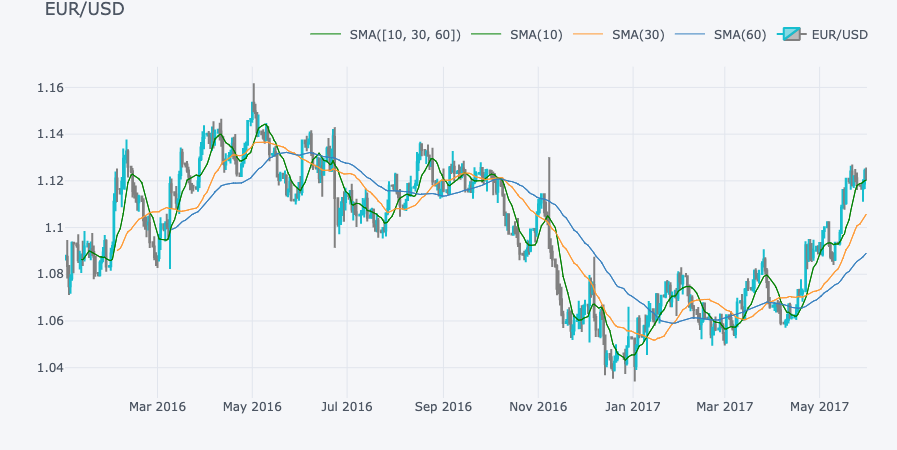

In [43]:
qf.iplot(asFigure=True)

### Bollinger Band

In [44]:
qf.add_bollinger_bands(periods=20, boll_std=2, colors=['magenta', 'grey'], fill=True)
qf.data.update()

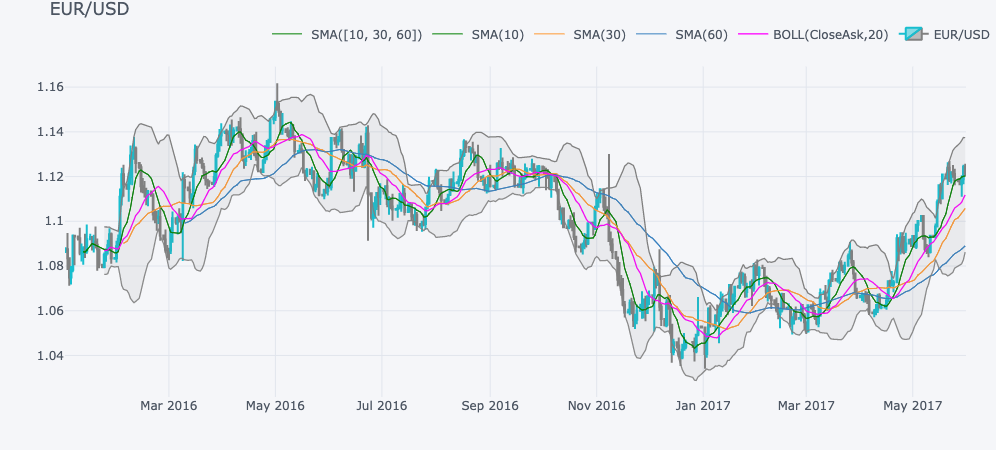

In [45]:
qf.iplot(asFigure=True)

### Relative Strength Index (RSI)

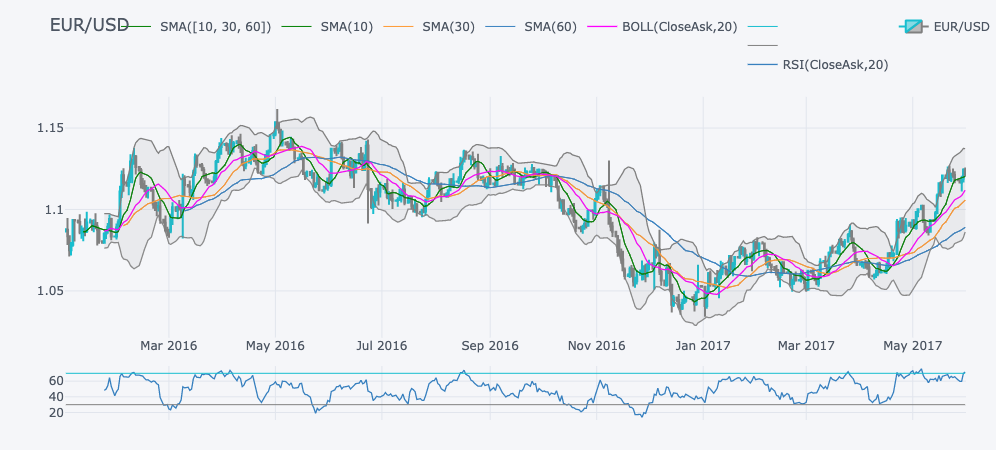

In [46]:
qf.add_rsi(periods=20, rsi_upper=70, rsi_lower=30, legend=False)
qf.iplot(asFigure=True)